In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
missing_values = ['NA','na','--','?','-','None','none','non','nil','NaN']
dfo = pd.read_excel('./datos/diabetes_py.xlsx',sheet_name='diabetes_python.xlsx', na_values=missing_values, encoding = "ISO-8859-1")
#dfo = pd.read_csv('diabetes_python.csv', na_values=missing_values, encoding = "ISO-8859-1", sep=';') 
#bu = pd.read_excel('./datos/diabetes_py.xlsx')
print('dfo Shape:',dfo.shape)
#dfo.head()
dfo.head(3)
#dfo.columns

dfo Shape: (115, 4)


,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199


## Data select

In [4]:
dfo.columns

Index(['clase', 'glucosa', 'insulina', 'sspg'], dtype='object')

In [6]:
cols = ['clase', 'glucosa', 'insulina', 'sspg']

df = dfo[cols]

print('df shape:',df.shape)
df.head()

df shape: (115, 4)


,clase,glucosa,insulina,sspg
0,1,97,289,117
1,1,105,319,143
2,1,90,356,199
3,1,90,323,240
4,1,86,381,157


## Limpieza

In [7]:
# Controlando valores nulos
df.isnull().any().any()

False

In [8]:
#porcentaje de valores null por columna
(df.isnull().sum() / len(df))*100

clase       0.0
glucosa     0.0
insulina    0.0
sspg        0.0
dtype: float64

In [9]:
#Eliminar los valores nulos
df_2 = df.dropna()
print('df shape:',df.shape)
print('df_2 shape:',df_2.shape)

df shape: (115, 4)
df_2 shape: (115, 4)


In [10]:
#porcentaje de valores null por columna
(df_2.isnull().sum() / len(df_2))*100

clase       0.0
glucosa     0.0
insulina    0.0
sspg        0.0
dtype: float64

In [11]:
pd.value_counts(df_2['clase'], sort = True) 
### clase 1 = normal
### clase 2 = pre-diabetico
### clase 3 = diabetico

1    66
2    26
3    23
Name: clase, dtype: int64

## Transformación

In [12]:
print('df_2 shape:',df_2.shape)
print(pd.value_counts(df_2['clase'], sort = True))

df_2 shape: (115, 4)
1    66
2    26
3    23
Name: clase, dtype: int64


## Observar las relaciones mediante una matriz de correlaciones


In [14]:
df_2.corr()['clase'].sort_values(ascending=False)

clase       1.000000
insulina    0.833399
glucosa     0.728553
sspg       -0.052124
Name: clase, dtype: float64

In [15]:
cols_f = ['clase', 'glucosa', 'insulina']
df_2[cols_f].corr()['clase'].sort_values(ascending=False)

clase       1.000000
insulina    0.833399
glucosa     0.728553
Name: clase, dtype: float64

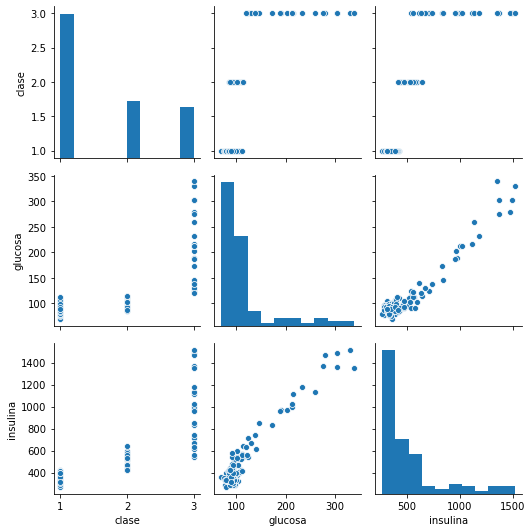

In [16]:
sns.pairplot(df_2[cols_f], height=2.5)
plt.tight_layout()
# plt.savefig('imagenes/10_03.png', dpi=300)
plt.show()

In [17]:
df_2[cols_f]

,clase,glucosa,insulina
0,1,97,289
1,1,105,319
2,1,90,356
3,1,90,323
4,1,86,381
...,...,...,...
110,3,120,636
111,3,138,741
112,3,188,958
113,3,339,1354


In [18]:
cols_fea = ['glucosa', 'insulina']

## Separar la data de ajuste y test

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_2[cols_fea].values

array([[  97,  289],
       [ 105,  319],
       [  90,  356],
       [  90,  323],
       [  86,  381],
       [ 100,  350],
       [  85,  301],
       [  97,  379],
       [  97,  296],
       [  91,  353],
       [  87,  306],
       [  78,  290],
       [  90,  371],
       [  80,  393],
       [  90,  364],
       [  99,  359],
       [  85,  296],
       [  90,  345],
       [  90,  378],
       [  88,  304],
       [  90,  327],
       [  92,  386],
       [  98,  365],
       [ 100,  352],
       [  86,  325],
       [  98,  321],
       [  70,  360],
       [  99,  336],
       [  75,  352],
       [  90,  353],
       [  85,  373],
       [  99,  376],
       [ 100,  367],
       [  78,  335],
       [ 106,  396],
       [ 102,  378],
       [  90,  360],
       [  94,  291],
       [  80,  269],
       [  93,  318],
       [  96,  356],
       [  88,  291],
       [  94,  313],
       [  93,  306],
       [  86,  319],
       [  96,  332],
       [  86,  323],
       [  89,

In [21]:
df_2[cols_f]['clase'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3])

In [22]:
X = df_2[cols_fea].values #df_4[cols_fea].iloc[:, :-1].values
y = df_2[cols_f]['clase'].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X_test

array([[  87,  306],
       [ 112,  568],
       [  90,  356],
       [ 110,  426],
       [  97,  379],
       [ 102,  599],
       [ 103,  533],
       [  88,  423],
       [ 213, 1001],
       [ 112,  414],
       [  85,  373],
       [  90,  356],
       [ 125,  714],
       [  98,  365],
       [  93,  306],
       [ 330, 1520],
       [  86,  325],
       [ 101,  469],
       [  93,  376],
       [  95,  391],
       [  85,  296],
       [  80,  393],
       [  70,  360]])

In [27]:
y_test

array([1, 2, 1, 1, 1, 2, 2, 2, 3, 1, 1, 1, 3, 1, 1, 3, 1, 2, 1, 1, 1, 1,
       1])

## Modelado

In [28]:
from numpy import array
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#pip install xgboost

In [29]:
#Se crea la lista "models" la cual contendra los algoritmos de machine learning para la construcción del modelo:
#El algoritmo 'LRN' el cual es 'LogisticRegression' que representa 'Regresión Logística',
#El algoritmo 'LDA' el cual es 'LinearDiscriminantAnalysis' que representa 'Análisis Discriminante',
#El algoritmo 'SVM' el cual es 'SVC' que representa 'Máquina de soporte de vectores',
#El algoritmo 'SGD' el cual es 'SGDClassifier' que representa 'Pendiente de Gradiente Estocástico',
#El algoritmo 'KNN' el cual es 'KNeighborsClassifier' que representa 'Vecinos más Cercanos',
#El algoritmo 'GNB' el cual es 'GaussianNB' que representa 'Clasificador Bayesiano Ingenuo',
#El algoritmo 'DTS' el cual es 'DecisionTreeClassifier' que representa 'Árbol de Decisión',
#El algoritmo 'RFS' el cual es 'RandomForestClassifier' que representa 'Bosques Aleatorios',
#El algoritmo 'NNM' el cual es 'MLPClassifier' que representa 'Redes Neuronales' y
#El algoritmo 'XGB' el cual es 'XGBClassifier' que representa 'Potenciador del Gradiente Extremo',
models = []
models.append(('LRN', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('SVM', SVC()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('DTS', DecisionTreeClassifier()))
models.append(('RFS', RandomForestClassifier()))
models.append(('NNM', MLPClassifier()))
models.append(('XGB', XGBClassifier()))

#Se crea una lista "result" que almacenara los resultados de la validación cruzada
results = []

#Se crea una lista "names" que almacenara los nombres de los algoritmos de machine learning
names = []

#Se ejecuta el ciclo 'for' con todos los algoritmos de machine learning elegidos:
#Repete y calcula la media aritmética de las medidas de evaluación de las diferentes particiones
#Proceso de validación cruzada con 10 interacciones de los datos de entrenamiento
#Se divide en 10 partes, entrena en 9, valida en 1 y repite el proceso 10 veces
for name, model in models:
	kfold = KFold(n_splits=10, random_state=7)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

LRN: 0.958889 (0.067412)
LDA: 0.903333 (0.074378)
SVM: 0.882222 (0.085085)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


SGD: 0.528889 (0.171428)
KNN: 0.955556 (0.073703)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


GNB: 0.925556 (0.091631)
DTS: 1.000000 (0.000000)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RFS: 1.000000 (0.000000)


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.8/site-package

NNM: 0.456667 (0.278286)
XGB: 1.000000 (0.000000)


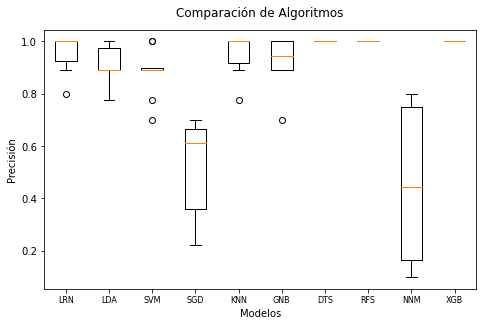

In [30]:
#Se crea el diagrama de caja y bigotes con los resultados de evaluación de los modelos para 
#Comparar la Distribución y Precisión media para cada modelo
fig = plt.figure()
fig.suptitle('Comparación de Algoritmos')
fig.subplots_adjust(left=0.00, right=1.0, top=0.9, bottom=0.0)
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=0, fontsize=8)
ax.set_xlabel('Modelos')
ax.set_ylabel('Precisión')
plt.show()

In [31]:
print('model:',names[9])
results[9]

model: XGB


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [32]:
print('model:',names[6])
results[6]

model: DTS


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
#Se escoge el mejor modelo predictivo
DTS = DecisionTreeClassifier()
#Se entrena el modelo escogido
DTS.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
#Se realiza las predicciones con los datos del array de prueba 'X_test'
predictionsDTS = DTS.predict(X_test)
#Puntaje de clasificación de precisión
print(accuracy_score(y_test, predictionsDTS))

#Matriz de confusión
print(confusion_matrix(y_test, predictionsDTS))

#Reporte de clasificación
print(classification_report(y_test, predictionsDTS))

0.9565217391304348
[[14  1  0]
 [ 0  5  0]
 [ 0  0  3]]
              precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         3

    accuracy                           0.96        23
   macro avg       0.94      0.98      0.96        23
weighted avg       0.96      0.96      0.96        23



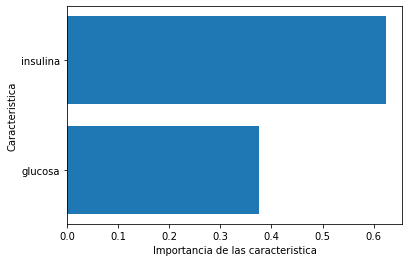

In [36]:
feature_names= cols_fea
caract=X_test.shape[1]
plt.barh(range(caract), DTS.feature_importances_)
plt.yticks(np.arange(caract), feature_names)
plt.xlabel("Importancia de las caracteristica")
plt.ylabel("Caracteristica")
plt.show()

In [37]:
res1 = pd.DataFrame(data=[feature_names, DTS.feature_importances_])
res1.transpose().sort_values(by=1, ascending=False)

,0,1
1,insulina,0.624676
0,glucosa,0.375324


## Manejo de clases desbalanceadas con la librería Python ImbLearn
No olvides instalar con:

pip install -U imbalanced-learn